# Analyzing Data Mining about Big Data and Machine Learning

This exercise serves as a practical application of the concepts and tools covered in Lesson 1. It provides an opportunity to apply and demonstrate the knowledge and skills acquired during the lesson.

## Sources

We will use the text from the wikipedia page 



In [1]:
url_bigdata = "https://en.wikipedia.org/wiki/Big_data"
url_machinelearning = "https://en.wikipedia.org/wiki/Machine_learning"

## Step 1:

First step in every data science process is getting the data. We will use `requests` library to do that:

In [26]:
import requests

bigdata_text = requests.get(url_bigdata).content.decode('utf-8')
machinelearning_text = requests.get(url_machinelearning).content.decode('utf-8')
print("-----------------------------------------------")
print("Big Data Text")
print(bigdata_text[:1000])
print("-----------------------------------------------")
print("Machine Learning Text")
print(machinelearning_text[:1000])

-----------------------------------------------
Big Data Text
<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled" lang="en" dir="ltr">
<head>
<meta charset="UTF-8">
<title>Big data - Wikipedia</title>
<script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled";(function(){var 

# Step 2 Transforming the Data

The next step is to convert the data into the form suitable for processing. In our case, we have downloaded HTML source code from the page, and we need to convert it into plain text.

There are many ways this can be done. We will use the simplest built-in [HTMLParser](https://docs.python.org/3/library/html.parser.html) object from Python. We need to subclass the `HTMLParser` class and define the code that will collect all text inside HTML tags, except `<script>` and `<style>` tags.

In [27]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')
    def handle_comment(self, data):
        print("Comment  :", data)

    def handle_entityref(self, name):
        c = chr(name2codepoint[name])
        print("Named ent:", c)

    def handle_charref(self, name):
        if name.startswith('x'):
            c = chr(int(name[1:], 16))
        else:
            c = chr(int(name))
        print("Num ent  :", c)

    def handle_decl(self, data):
        print("Decl     :", data)

parser = MyHTMLParser()
#For Big Data Text
parser.feed(bigdata_text)
bigdata_text = parser.res

#For Machine Learning Text
parser = MyHTMLParser()
parser.feed(machinelearning_text)
machinelearning_text = parser.res

print("------------------------------------------")
print("Big Data")
print(bigdata_text[:1000])
print("------------------------------------------")
print("Machine Learning Text")
print(machinelearning_text[:1000])

Decl     : DOCTYPE html
Comment  :  CentralNotice 
Comment  :  
NewPP limit report
Parsed by mw1373
Cached time: 20230524134237
Cache expiry: 1814400
Reduced expiry: false
Complications: [vary‐revision‐sha1, show‐toc]
CPU time usage: 2.368 seconds
Real time usage: 2.623 seconds
Preprocessor visited node count: 17283/1000000
Post‐expand include size: 492301/2097152 bytes
Template argument size: 16612/2097152 bytes
Highest expansion depth: 21/100
Expensive parser function count: 26/500
Unstrip recursion depth: 1/20
Unstrip post‐expand size: 646520/5000000 bytes
Lua time usage: 1.622/10.000 seconds
Lua memory usage: 26266736/52428800 bytes
Lua Profile:
    ?                                                                180 ms       11.1%
    MediaWiki\Extension\Scribunto\Engines\LuaSandbox\LuaSandboxCallback::gsub      160 ms        9.9%
    MediaWiki\Extension\Scribunto\Engines\LuaSandbox\LuaSandboxCallback::match      140 ms        8.6%
    MediaWiki\Extension\Scribunto\Engines\LuaSand

# Step 3: Getting Insights

The most important step is to turn our data into some form from which we can draw insights. In our case, we want to extract keywords from the text, and see which keywords are more meaningful.

We will use Python library called [RAKE](https://github.com/aneesha/RAKE) for keyword extraction. 

In [28]:
import nlp_rake
import pprint as pp

bigdata_extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
bigdata_res = bigdata_extractor.apply(bigdata_text)

machinelearning_extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=8)
machinelearning_res = machinelearning_extractor.apply(machinelearning_text)

print("-------------------------------------")
print("Big Data Keywords")
pp.pprint(bigdata_res)

print("-------------------------------------")
print("Machine Learning Keywords")
pp.pprint(machinelearning_res)



-------------------------------------
Big Data Keywords
[('big data', 4.0),
 ('data sets', 4.0),
 ('machine learning', 4.0),
 ('latin america', 4.0),
 ('computer-aided diagnosis', 4.0),
 ('data flow', 4.0),
 ('scientific reports', 4.0),
 ('wayback machine', 4.0),
 ('washington post', 4.0),
 ('english version', 4.0),
 ('unsourced statements', 4.0),
 ('data management', 3.916666666666667),
 ('artificial intelligence', 3.909090909090909),
 ('predictive analytics', 3.8421052631578947),
 ('data collected', 3.769230769230769),
 ('business intelligence', 3.7552447552447554),
 ('^ kitchin', 3.73876404494382),
 ('promotional source', 3.7142857142857144),
 ('citation needed', 3.7142857142857144),
 ('international journal', 3.7),
 ('cite journal', 3.7),
 ('york times', 3.6923076923076925),
 ('financial times', 3.6923076923076925),
 ('unstructured data', 3.625),
 ('structured data', 3.571428571428571),
 ('large amount', 3.5238095238095237),
 ('data analysis', 3.4761904761904763),
 ('marketing anal

We obtained a list terms together with associated degree of importance. 

## Step 4: Visualizing the Result

People can interpret the data best in the visual form. Thus it often makes sense to visualize the data in order to draw some insights. We can use `matplotlib` library in Python to plot simple distribution of the keywords with their relevance:

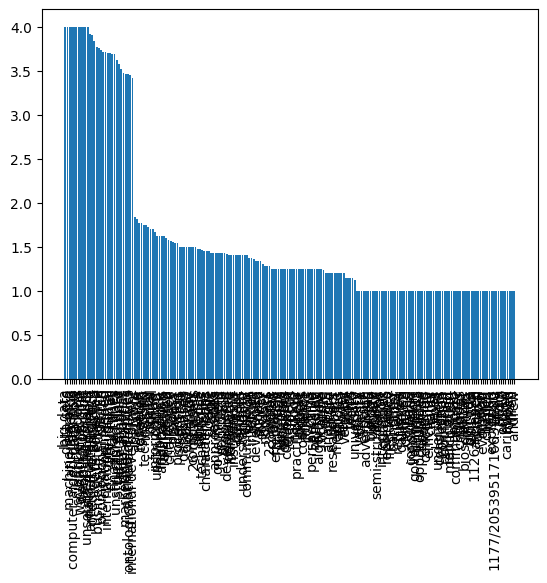

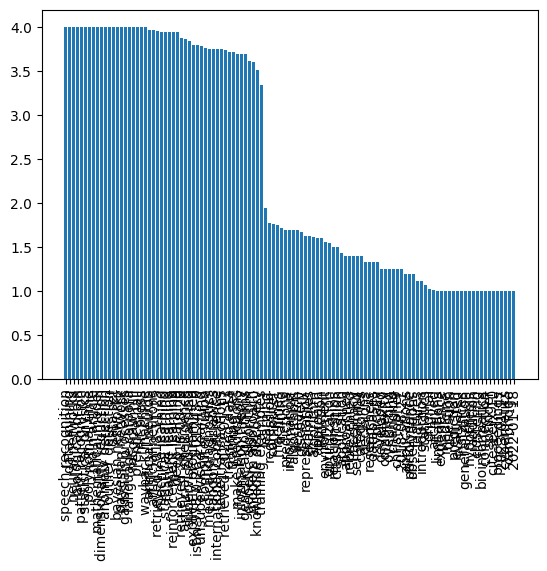

In [31]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(bigdata_res) 
plot(machinelearning_res)

`WordCloud` object is responsible for taking in either original text, or pre-computed list of words with their frequencies, and returns and image, which can then be displayed using `matplotlib`:

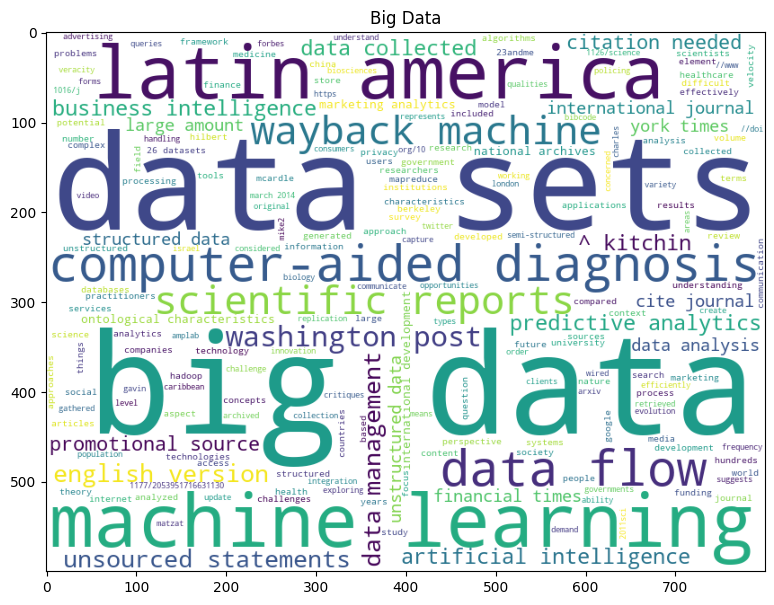

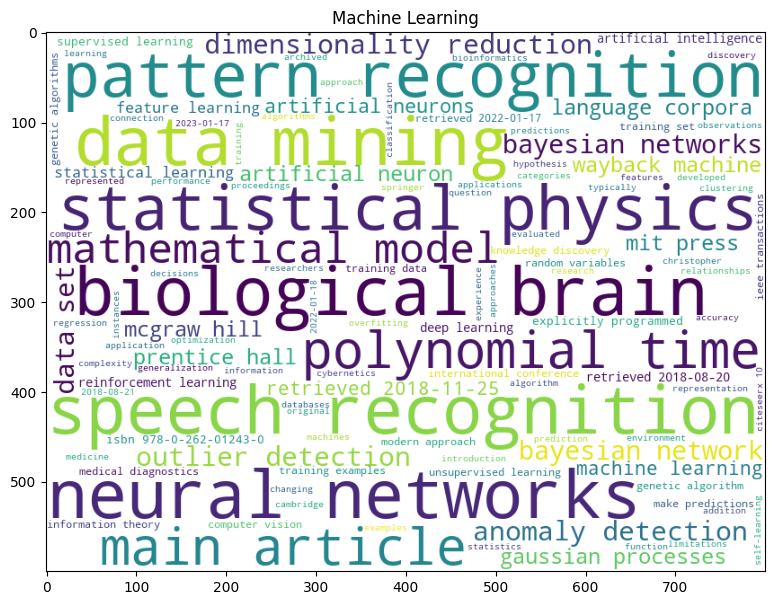

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.title("Big Data")
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in bigdata_res }))

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.title("Machine Learning")
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in machinelearning_res }))

We can also pass in the original text to `WordCloud` - let's see if we are able to get similar result:

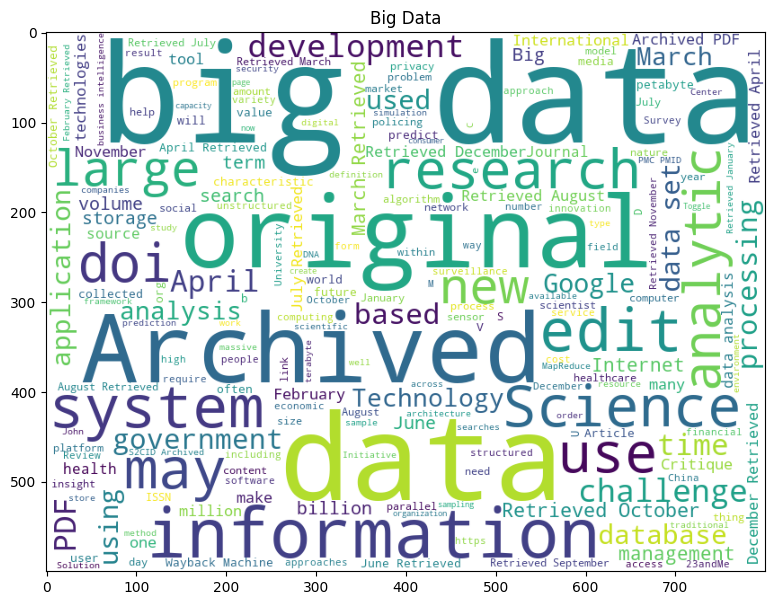

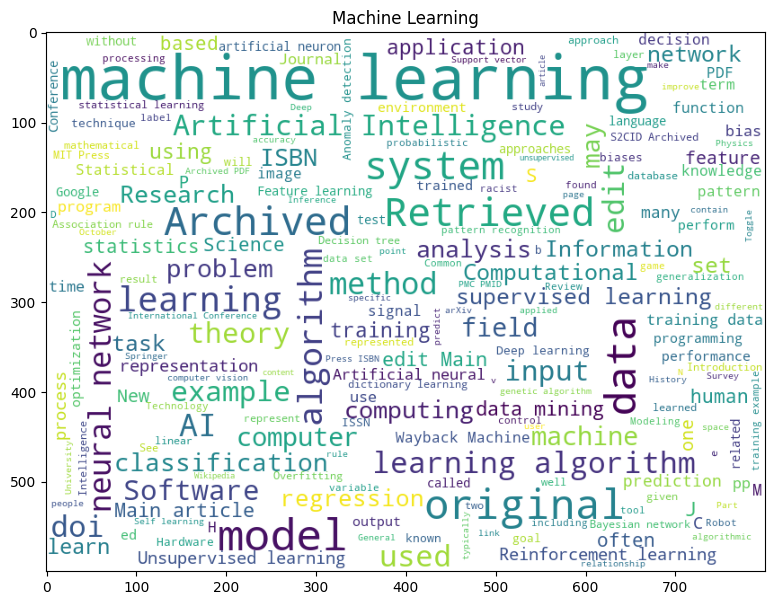

In [37]:

plt.figure(figsize=(15,7))
plt.title("Big Data")
plt.imshow(wc.generate(bigdata_text))


plt.figure(figsize=(15,7))
plt.title("Machine Learning")
plt.imshow(wc.generate(machinelearning_text))
